Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train , batch_size=batch_size, image_size=(img_height,
    img_width), seed=123, validation_split=0.2, subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train , batch_size=batch_size, image_size=(img_height,
    img_width), seed=123, validation_split=0.2, subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

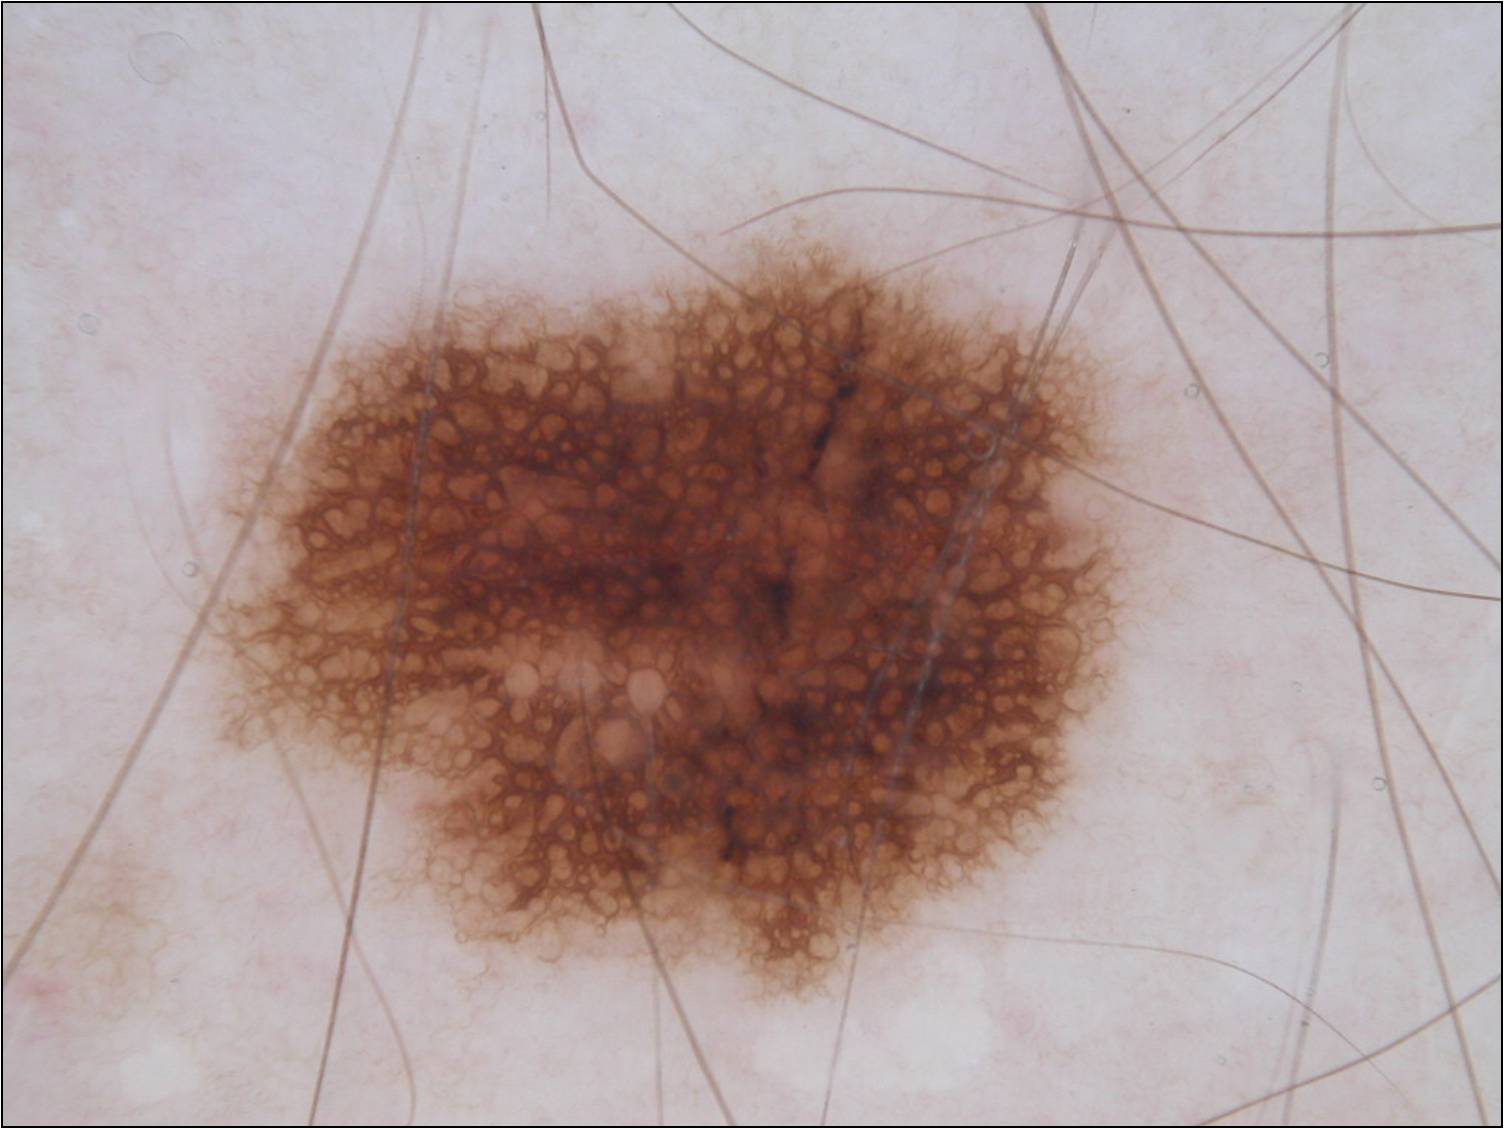

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
nevus = list(data_dir_train.glob('nevus/*'))
PIL.Image.open(str(nevus[0]))

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [19]:
model=Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [20]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 41, 41, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 64)       

### Train the model

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 60s 1s/step - loss: 21.9126 - accuracy: 0.2106 - val_loss: 1.6527 - val_accuracy: 0.4295
Epoch 2/20
56/56 [==============================] - 59s 1s/step - loss: 1.6781 - accuracy: 0.3771 - val_loss: 1.4823 - val_accuracy: 0.4743
Epoch 3/20
56/56 [==============================] - 59s 1s/step - loss: 1.4630 - accuracy: 0.4642 - val_loss: 1.4921 - val_accuracy: 0.4899
Epoch 4/20
56/56 [==============================] - 58s 1s/step - loss: 1.4023 - accuracy: 0.5089 - val_loss: 1.4304 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 60s 1s/step - loss: 1.4169 - accuracy: 0.5039 - val_loss: 1.4831 - val_accuracy: 0.4832
Epoch 6/20
56/56 [==============================] - 60s 1s/step - loss: 1.4241 - accuracy: 0.5029 - val_loss: 1.6026 - val_accuracy: 0.4362
Epoch 7/20
56/56 [==============================] - 60s 1s/step - loss: 1.4447 - accuracy: 0.4875 - val_loss: 1.4616 - val_accuracy: 0.4899
Epoch 8/20
56/56 [=

### Visualizing training results

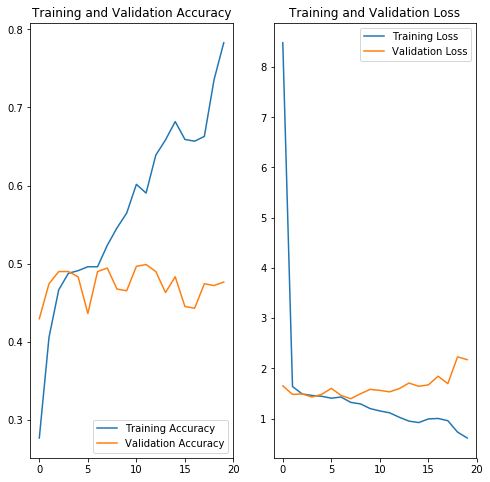

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here

<span style='color:green'>From the Above Observations, we have noticed that the margin between training and validation accuracy is large<br/>
It is also observed that validation accuracy dosent goes beyond 50 percent and training accuracy stands at 80% at final epoch
The above observation denotes that Model is overfitting to some extent</span>

#### Data Augmentation is a Strategy where the model can fight with overfitting. As overfitting in this case might happen becauseof less training examples, augmentation can effectively increase number of samples

In [32]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

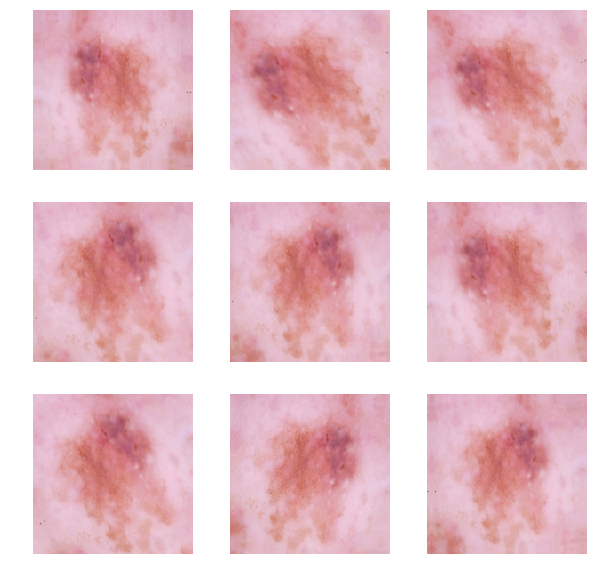

In [33]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### Creating another model with the augmented data to avoid overfitting with adding dropout before dense layer

In [35]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here
model=Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#adding a dropout layer
model.add(layers.Dropout(0.3)) 
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))

### Compiling the model

In [36]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [37]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 54s 930ms/step - loss: 2.0787 - accuracy: 0.2079 - val_loss: 1.8338 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 54s 925ms/step - loss: 1.7884 - accuracy: 0.3427 - val_loss: 1.7842 - val_accuracy: 0.3333
Epoch 3/20
56/56 [==============================] - 55s 953ms/step - loss: 1.7061 - accuracy: 0.3629 - val_loss: 1.6531 - val_accuracy: 0.3781
Epoch 4/20
56/56 [==============================] - 56s 972ms/step - loss: 1.5997 - accuracy: 0.4071 - val_loss: 1.6045 - val_accuracy: 0.3870
Epoch 5/20
56/56 [==============================] - 56s 970ms/step - loss: 1.5316 - accuracy: 0.4337 - val_loss: 1.4989 - val_accuracy: 0.4676
Epoch 6/20
56/56 [==============================] - 55s 956ms/step - loss: 1.4470 - accuracy: 0.4823 - val_loss: 1.5788 - val_accuracy: 0.4474
Epoch 7/20
56/56 [==============================] - 57s 990ms/step - loss: 1.4612 - accuracy: 0.4851 - val_loss: 1.4128 - val_accuracy: 0.5302

### Visualizing the results

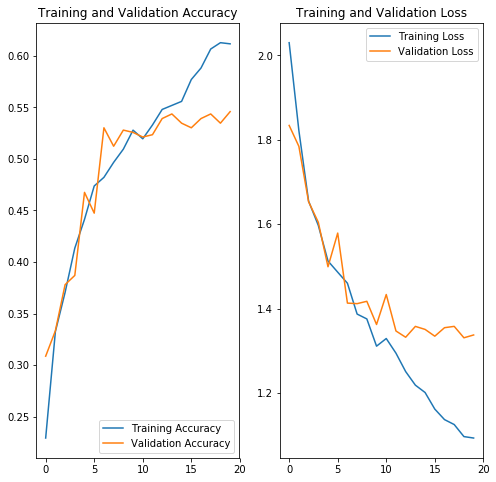

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### <span style='color:green'>As observed, we've noticed that model improved greatly with the dropout , when compared to the previous model , where the training accuracy has dropped and validation accuracy has increased to an extent with the augmented version, which means that our model performed well than before</span>

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [39]:
from glob import glob

In [40]:
## Your code goes here.
# creating new list of path for original training dataset
path_list_org = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_org

['C:\\Users\\DSS7884\\Downloads\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg',
 'C:\\Users\\DSS7884\\Downloads\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg',
 'C:\\Users\\DSS7884\\Downloads\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025825.jpg',
 'C:\\Users\\DSS7884\\Downloads\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025953.jpg',
 'C:\\Users\\DSS7884\\Downloads\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025957.jpg',
 'C:\\Users\\DSS7884\\Downloads\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\

In [41]:
# Extracting class names
lesion_list_org = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*','*.jpg'))]
lesion_list_org

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [42]:
# creating dictionary with path as key and labels as values
dataframe_dict_org = dict(zip(path_list_org, lesion_list_org))

In [43]:
# creating a dataframe for the images in the train folder, with variables as path and label
df1 = pd.DataFrame(list(dataframe_dict_org.items()),columns = ['Path','Label'])

In [44]:
# extracting no of images present in each class
df1['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

In [45]:
df1['Label'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

pigmented benign keratosis    20.6%
melanoma                      19.6%
basal cell carcinoma          16.8%
nevus                         15.9%
squamous cell carcinoma        8.1%
vascular lesion                6.2%
actinic keratosis              5.1%
dermatofibroma                 4.2%
seborrheic keratosis           3.4%
Name: Label, dtype: object

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
##### - <span style='color:green'>The class seborrehic keratosis has least number of samples</span>
#### - Which classes dominate the data in terms proportionate number of samples?
##### - <span style='color:green'>1) Pigmented benign keratosis(20%) </span>
##### -<span style='color:green'>2) melanoma (19.6%)</span>
##### - <span style='color:green'>3)basal cell carcinoma (16.8)</span>
##### - <span style='color:green'>4) nevus (15.9)</span>

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [46]:
# !pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [47]:
path_to_training_dataset="C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x232020F4780>: 100%|█| 500/500 [00:04<00:00, 100.69 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2320918A048>: 100%|█| 500/500 [00:06<00:00, 81.96 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x232080FF898>: 100%|█| 500/500 [00:07<00:00, 70.15 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=965x724 at 0x23204443588>: 100%|█| 500/500 [00:35<00:00, 14.11 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x2326DEC5E80>: 100%|█| 500/500 [00:28<00:00, 17.64 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2326F732C18>: 100%|█| 500/500 [00:06<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x232010AECC0>: 100%|█| 500/500 [00:15<00:00, 31.26 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2320830E4A8>: 100%|█| 500/500 [00:06<00:00, 77.94 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2320844CB38>: 100%|█| 500/500 [00:06<00:00, 74.36 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [48]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [49]:
# this is path for augmented images
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\DSS7884\\Downloads\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_467d6d1e-1852-4e5e-8130-ddb29b703a78.jpg',
 'C:\\Users\\DSS7884\\Downloads\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_a88f4028-37b7-4b80-86f0-b3a8106730df.jpg',
 'C:\\Users\\DSS7884\\Downloads\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_bcb2a6d8-07f2-4bf0-9381-d2968bf24df8.jpg',
 'C:\\Users\\DSS7884\\Downloads\\Upgrad\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c162f742-a972-4f41-8ea7-8b5a3bd11862.jpg',
 'C:\\Users\\DSS

In [50]:
# Extracting class names for augmented images
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [51]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [52]:
# creating the new dataframe for augmented images and appending it to original dataframe we created before
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df1.append(df2)

In [53]:
# extracting number of images from each class
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [54]:
new_df['Label'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

pigmented benign keratosis    14.3%
melanoma                      13.9%
basal cell carcinoma          13.0%
nevus                         12.7%
squamous cell carcinoma       10.1%
vascular lesion                9.5%
actinic keratosis              9.1%
dermatofibroma                 8.8%
seborrheic keratosis           8.6%
Name: Label, dtype: object

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [55]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [56]:
data_dir_train=pathlib.Path("C:/Users/DSS7884/Downloads/Upgrad/CNN/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [57]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [61]:
model=Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes,activation='softmax'))


In [62]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 41, 41, 64)        36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 20, 20, 64)      

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [66]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [67]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
169/169 [==============================] - 159s 933ms/step - loss: 1.2080 - accuracy: 0.5231 - val_loss: 1.1327 - val_accuracy: 0.5746
Epoch 2/30
169/169 [==============================] - 159s 934ms/step - loss: 1.1187 - accuracy: 0.5714 - val_loss: 1.0756 - val_accuracy: 0.5642
Epoch 3/30
169/169 [==============================] - 161s 946ms/step - loss: 1.0385 - accuracy: 0.6025 - val_loss: 0.9872 - val_accuracy: 0.6184
Epoch 4/30
169/169 [==============================] - 202s 1s/step - loss: 1.0047 - accuracy: 0.6098 - val_loss: 0.9246 - val_accuracy: 0.6526
Epoch 5/30
169/169 [==============================] - 235s 1s/step - loss: 0.9184 - accuracy: 0.6410 - val_loss: 0.8204 - val_accuracy: 0.6808
Epoch 6/30
169/169 [==============================] - 236s 1s/step - loss: 0.8042 - accuracy: 0.6833 - val_loss: 0.8275 - val_accuracy: 0.6778
Epoch 7/30
169/169 [==============================] - 235s 1s/step - loss: 0.7660 - accuracy: 0.7156 - val_loss: 0.7824 - val_accurac

#### **Todo:**  Visualize the model results

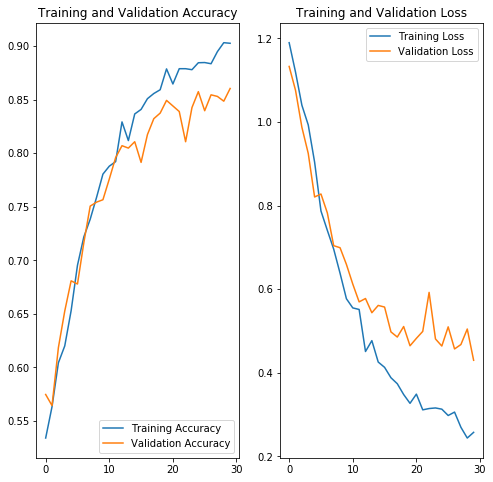

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



##### <span style='color:green'> From the observation , it is evident that training accuracy goes beyond 90% and Validation accuracy is observed 85% , which denotes that our architechture is performing well and generating a well fit model.Also , we got of rid overfitting here which we noticed without the data augmentation.</span>

In [69]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test , batch_size=batch_size, image_size=(img_height,
    img_width), seed=123, validation_split=None, subset=None
)

Found 118 files belonging to 9 classes.


In [71]:
print("Evaluate on test data")
results = model.evaluate(test_ds, batch_size=batch_size)
print("test loss, test acc:", results)

Evaluate on test data
4/4 [==============================] - 9s 243ms/step - loss: 5.7790 - accuracy: 0.4153
test loss, test acc: [5.778950214385986, 0.41525423526763916]


##### We've got test accuracy as 41.5%.

##### <span style='color:green'>The below are the observations that are noticed in building the model at various steps</span>

  |Sl.No | Train Acc #  | Validation Acc | Test Acc   | With/Without Augmentation   | With/Without Dropout   | 
|---:|:-------------|:-----------|:------|:------| :----------|
| 1 | 80%  | 50%    |  -   | Without Augmentation    | Without Dropout     |
| 2 | 65%  | 55%  |  -  | With Augmentation |  With Dropout     |
| 3 | 90%  | 85%  |  41%  | With Augmentation library |  With Dropout     |